<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/Celinka_Exercise_Week_4_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [ ]:
#1
dataset = pd.read_csv('https://raw.githubusercontent.com/celinka12/dataset_DM/refs/heads/main/penguins_size.csv')
dataset.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
67,Adelie,Biscoe,41.1,19.1,188.0,4100.0,MALE
173,Chinstrap,Dream,48.5,17.5,191.0,3400.0,MALE
157,Chinstrap,Dream,45.2,17.8,198.0,3950.0,FEMALE
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,MALE
265,Gentoo,Biscoe,43.6,13.9,217.0,4900.0,FEMALE
97,Adelie,Dream,40.3,18.5,196.0,4350.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
89,Adelie,Dream,38.9,18.8,190.0,3600.0,FEMALE
180,Chinstrap,Dream,46.4,17.8,191.0,3700.0,FEMALE
252,Gentoo,Biscoe,45.1,14.5,207.0,5050.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [ ]:
#2
dataset.info()
# menampilkan ringkasan tentang jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori dari DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [ ]:
#3
dataset.describe()
#menghasilkan statistik deskriptif dari kolom numerik dalam DataFrame. Untuk memahami distribusi dan variasi data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [ ]:
#4
colom = {'species', 'island', 'sex'}
for col in colom:
  print(dataset[col].value_counts())
#menghitung frekuensi kemunculan nilai unik di kolom species, island, dan sex dalam dataset, termasuk nilai kosong jika ada (dropna=False)

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


5. Null handling

In [ ]:
#5
dataset.dropna(inplace=True)
dataset.isnull().sum()
#dropna() digunakan untuk menghapus baris atau kolom yang mengandung nilai kosong (NaN).
#isnull()  untuk memeriksa apakah ada nilai yang kosong (null atau NaN) di dalam dataset

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

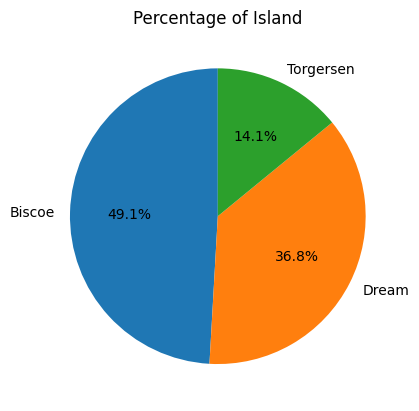

In [ ]:
#6
island_count = dataset['island'].value_counts()
plt.pie(island_count, labels=island_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Island')
plt.show()

#membuat diagram pie untuk menunjukkan persentase jumlah data dari masing-masing pulau dalam kolom island.
#island_count menghitung frekuensi setiap pulau.
#plt.pie() membuat diagram pie dengan label nama pulau dan persentase masing-masing.
#plt.title() menambahkan judul "Percentage of Island".
#plt.show() menampilkan grafik tersebut.
#dibuat untuk melihat persentase island tertinggi ddari ketiga island yang ada, pertama diurutan island biscoe lalu dream dan terakhir torgersen

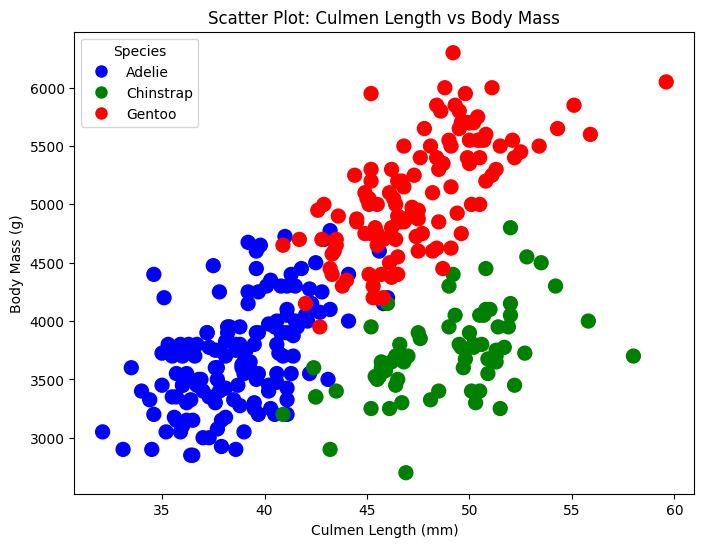

In [ ]:
#visualization Scatter Plot
plt.figure(figsize=(8, 6))
#Membuat figure baru dengan ukuran 8x6 inci untuk scatter plot.
species_colors = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
#Mendefinisikan dictionary yang menghubungkan spesies penguin dengan warna tertentu.
plt.scatter(dataset['culmen_length_mm'], dataset['body_mass_g'], c=dataset['species'].map(species_colors), label=dataset['species'], s=100)
#Membuat scatter plot menggunakan data dari kolom culmen_length_mm (sumbu X) dan body_mass_g (sumbu Y).

plt.title('Scatter Plot: Culmen Length vs Body Mass')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in species_colors.values()]
#Membuat handle untuk legenda. Ini digunakan untuk menciptakan simbol yang merepresentasikan setiap warna di legenda.
labels = species_colors.keys()
plt.legend(handles, labels, title="Species")

plt.show()
#Menampilkan scatter plot di layar.


7. Check unique value of our target variable

In [ ]:
#7
print(dataset['species'].unique())
#menampilkan daftar nilai unik dari kolom species dalam dataset, yaitu semua jenis spesies yang ada tanpa duplikasi.

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [ ]:
#8
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['island'] = encoder.fit_transform(dataset['island'])
dataset['sex'] = encoder.fit_transform(dataset['sex'])

dataset.head()

# LabelEncoder dari scikit-learn untuk mengonversi nilai kategorikal di kolom island dan sex menjadi nilai numerik.
#Setiap kategori diubah menjadi angka sehingga bisa digunakan dalam analisis atau model machine learning.
#Setelah transformasi, dataset diperbarui dan menampilkan beberapa baris pertama dengan dataset.head().

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [ ]:
#9
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
#Membuat objek LabelEncoder bernama encoder yang akan digunakan untuk proses encoding kolom-kolom kategorikal dalam dataset.
dataset['species'] = encoder.fit_transform(dataset['species'])
#Kolom species (nama spesies penguin) diubah menjadi angka dengan fit_transform(),
#yang pertama-tama "memetakan" setiap kategori (misalnya, "Adelie", "Chinstrap", "Gentoo") ke sebuah angka, dan kemudian mengganti kategori-kategori tersebut dengan nilai numerik.

dataset.head()
#Menampilkan 5 baris pertama dari dataset yang telah diubah.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

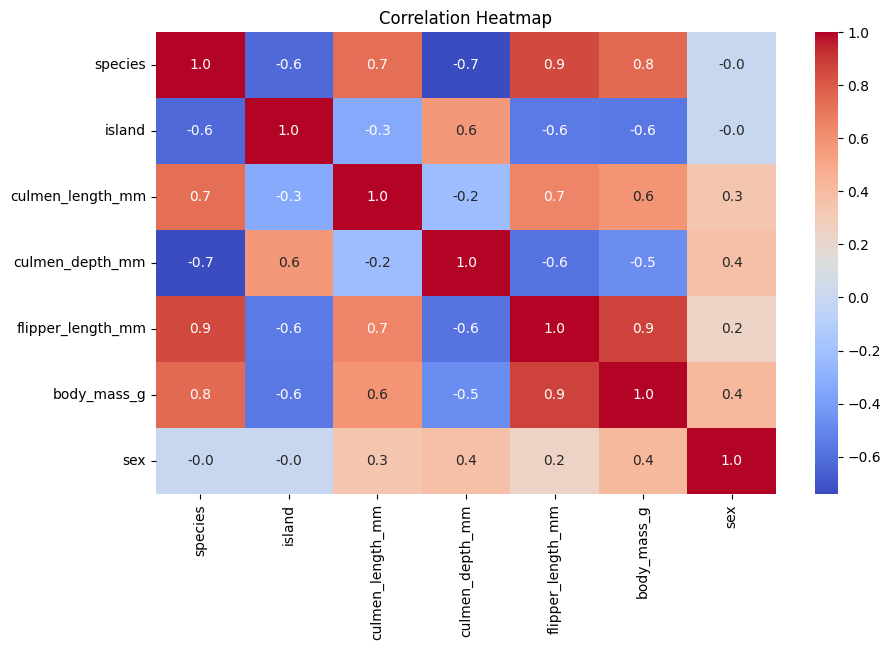

In [ ]:
#10
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

#menghitung matriks korelasi dari dataset menggunakan dataset.corr(), lalu membuat heatmap untuk visualisasi hubungan antar variabel.
#plt.figure(figsize=(10, 6)) mengatur ukuran gambar.
#sns.heatmap() menggambar heatmap dengan anotasi nilai korelasi dan palet warna 'coolwarm'.
#plt.title() menambahkan judul "Correlation Heatmap".
#plt.show() menampilkan grafik tersebut.

Panjang flipper dan massa tubuh memiliki korelasi sangat kuat (0.9), menunjukkan penguin dengan flipper lebih panjang cenderung lebih berat.
Spesies penguin berkorelasi kuat dengan panjang flipper (0.9) dan massa tubuh (0.8).
Kedalaman culmen memiliki korelasi negatif dengan spesies dan panjang culmen (sekitar -0.7).
Jenis kelamin tidak memiliki korelasi signifikan dengan variabel lainnya.

## Machine Learning

1. Splitting X and y

In [ ]:
#1
X = dataset.drop('species', axis=1)
y = dataset['species']

#memisahkan fitur (variabel independen) dan target (variabel dependen) dalam dataset untuk keperluan analisis atau model machine learning.

#X: DataFrame yang berisi semua kolom kecuali kolom species (dihapus dengan drop()).
#y: Series yang berisi kolom species, yang merupakan target yang ingin diprediksi.

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [ ]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# membagi dataset menjadi dua bagian: data pelatihan (train) dan data pengujian (test) menggunakan fungsi train_test_split dari scikit-learn.
# X: Data fitur (input) yang akan digunakan untuk membuat model.
# y: Target atau label (output) yang akan diprediksi.
# test_size=0.20: Menentukan bahwa 20% dari dataset akan digunakan sebagai data pengujian, sementara 80% akan digunakan untuk pelatihan.
# random_state=42: Menjamin bahwa pembagian data selalu sama setiap kali kode dijalankan (agar hasil bisa direproduksi).

In [ ]:
#3
print(X_train.shape)
print(X_test.shape)

#Mengetahui berapa banyak sampel dan fitur yang ada dalam data pelatihan dan pengujian setelah pembagian dataset, mencetak ukuran (dimensi) dari data fitur hasil pembagian (X_train dan X_test)
#X_train.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pelatihan. Biasanya, ini dalam bentuk (jumlah sampel, jumlah fitur).
#X_test.shape: Mencetak ukuran atau dimensi dari data fitur yang digunakan untuk pengujian.

(267, 6)
(67, 6)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [ ]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy index
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

#criterion='entropy': Menggunakan entropy sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, untuk menghindari overfitting.
#random_state=0: Menetapkan seed untuk memastikan bahwa hasil pembagian akan selalu sama setiap kali kode dijalankan (agar bisa direproduksi).
#clf_en.fit = Melatih (fit) model dengan data pelatihan (X_train dan y_train), sehingga model dapat mempelajari hubungan antara fitur (X_train) dan target (y_train).

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
#b
y_pred_en = clf_en.predict(X_test)

#clf_en = untuk prediksi target (label) dari data fitur pengujian X_test.
# y_pred_en = perkiraan nilai target yang sesuai untuk setiap sampel dalam X_test.

In [ ]:
#c
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
#accuracy_score = Menghitung skor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en). Akurasi adalah rasio jumlah prediksi yang benar terhadap total prediksi.
#{0:0.4f}: Format untuk mencetak hasil akurasi dengan 4 angka desimal.

Model accuracy score with criterion entropy index: 0.9701


In [ ]:
#d
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
#clf_en.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang sudah dilatih
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))
#clf_en.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumny


Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

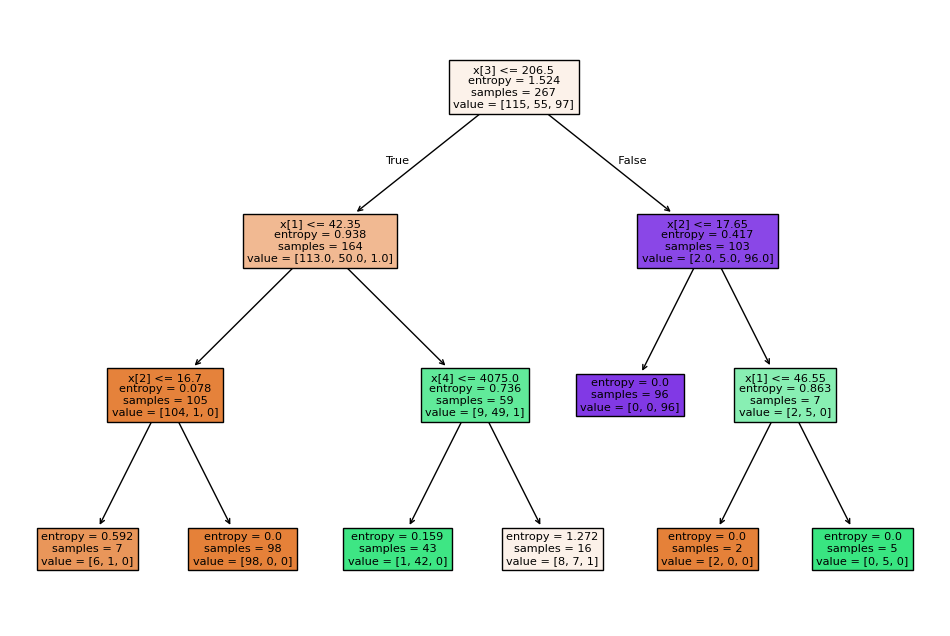

In [ ]:
#e
plt.figure(figsize=(12,8))
# figure (kanvas gambar) dengan ukuran 12x8 inci untuk visualisasi, sehingga lebih besar dan lebih mudah dilihat.

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

#clf_en.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan.
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.
#filled=True: Mengisi setiap node dengan warna yang menunjukkan dominasi kelas di node tersebut, memudahkan interpretasi visual.

2. Criterion Gini index

In [ ]:
#a
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

#criterion='gini': Menggunakan Gini impurity sebagai ukuran untuk menentukan kualitas pemisahan (split) pada node dalam pohon keputusan.
#max_depth=3: Membatasi kedalaman maksimum pohon keputusan hingga 3, yang dapat mencegah model overfitting.
#random_state=0: Menetapkan seed untuk memastikan hasil yang konsisten setiap kali kode dijalankan.
#clf_gini.fit: Melatih model dengan data pelatihan (X_train, y_train).

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#b
y_pred_gini = clf_gini.predict(X_test)
#clf_gini.predict(X_test): Menggunakan model clf_gini (yang sudah dilatih) untuk memprediksi label (target) dari data fitur pengujian X_test.
#y_pred_gini: Hasil prediksi dari model, yaitu nilai target yang diperkirakan untuk setiap sampel dalam X_test.

In [ ]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#kor akurasi, yaitu perbandingan antara label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).
#Akurasi dihitung sebagai rasio jumlah prediksi yang benar terhadap total jumlah prediksi.

Model accuracy score with criterion gini index: 0.9851


In [ ]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
#clf_gini.score(X_train, y_train): Menghitung akurasi model pada data pelatihan (X_train, y_train). Ini menunjukkan seberapa baik model memprediksi data yang telah dilatih.
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))
#clf_gini.score(X_test, y_test): Menghitung akurasi model pada data pengujian (X_test, y_test). Ini menunjukkan seberapa baik model memprediksi data yang belum pernah dilihat sebelumnya.

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

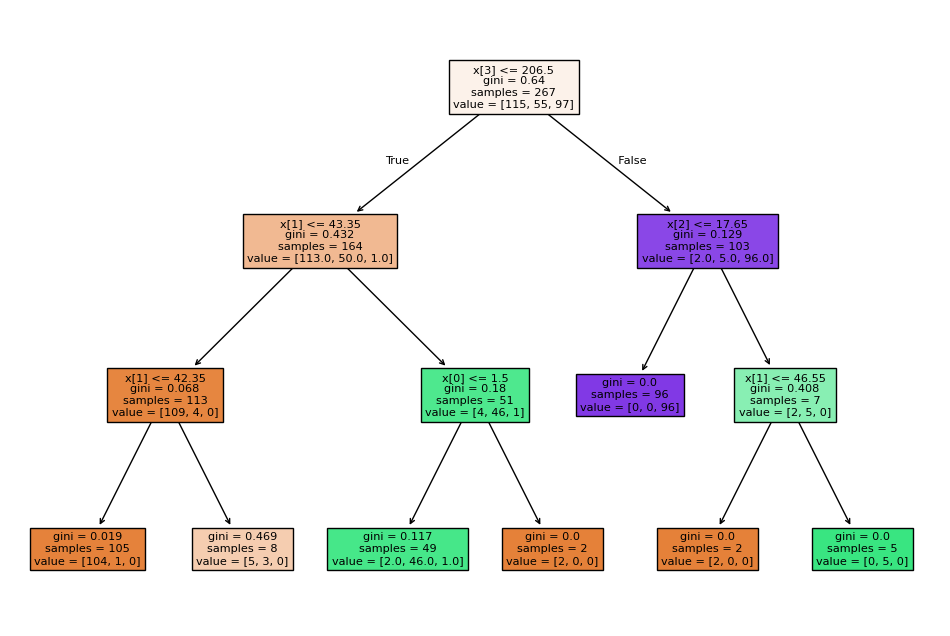

In [ ]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)
#clf_gini.fit(X_train, y_train): Melatih ulang model Decision Tree menggunakan data pelatihan (X_train dan y_train).
#tree.plot_tree(...): Membuat visualisasi dari struktur pohon keputusan (decision tree) yang terbentuk.

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [ ]:
#f
#confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_en)
cm_en = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix entropy: \n', cm_gini)
print('Confusion matrix gini index: \n', cm_en)

#confusion_matrix(y_test, y_pred_en): Menghitung confusion matrix untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#confusion_matrix(y_test, y_pred_gini): Menghitung confusion matrix untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini).


Confusion matrix entropy: 
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion matrix gini index: 
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [ ]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

#classification_report(y_test, y_pred_en): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Entropy, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_en).
#classification_report(y_test, y_pred_gini): Menghitung dan mencetak laporan klasifikasi untuk model dengan kriteria Gini, menggunakan label sebenarnya (y_test) dan prediksi yang dibuat oleh model (y_pred_gini)

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [ ]:
#h
print(' Gini Criterion memiliki akurasi yang lebih tinggi (0.99) dibandingkan dengan model yang menggunakan Entropy Criterion (0.97). \n Untuk kelas 1 ada kesalahan klasifikasi namun model Gini menunjukkan kinerja yang lebih baik dibandingkan model Entropy.')
print('Confusion matrix untuk model dengan kriteria Gini menunjukkan 31 benar positif untuk kelas 0 dan tidak ada kesalahan klasifikasi, \n sementara model Entropy mencatat 30 benar positif dengan satu kesalahan klasifikasi untuk kelas yang sama. \n Dalam hal precision, model Gini mendapatkan nilai 1.00 untuk kelas 1, sedangkan model Entropy hanya 0.92.')
print('Keduanya sama-sama memiliki hasil yang baik namun lebih baik menggunakan Gini dalam prediksi klasifikasi melihat hasilnya lebih unggul')


 Gini Criterion memiliki akurasi yang lebih tinggi (0.99) dibandingkan dengan model yang menggunakan Entropy Criterion (0.97). 
 Untuk kelas 1 ada kesalahan klasifikasi namun model Gini menunjukkan kinerja yang lebih baik dibandingkan model Entropy.
Confusion matrix untuk model dengan kriteria Gini menunjukkan 31 benar positif untuk kelas 0 dan tidak ada kesalahan klasifikasi, 
 sementara model Entropy mencatat 30 benar positif dengan satu kesalahan klasifikasi untuk kelas yang sama. 
 Dalam hal precision, model Gini mendapatkan nilai 1.00 untuk kelas 1, sedangkan model Entropy hanya 0.92.
Keduanya sama-sama memiliki hasil yang baik namun lebih baik menggunakan Gini dalam prediksi klasifikasi melihat hasilnya lebih unggul


## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [ ]:
#a
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

#nb_classifier = GaussianNB(): Membuat instance dari kelas GaussianNB, yang akan digunakan sebagai model klasifikasi.
#nb_classifier.fit(X_train, y_train): Melatih model nb_classifier menggunakan data pelatihan X_train (fitur) dan y_train (label target).
#Model ini belajar dari data pelatihan untuk menentukan hubungan antara fitur dan kelas target.

GaussianNB()

In [ ]:
#b
nb_y_pred = nb_classifier.predict(X_test)
#Naive Bayes yang telah dilatih (nb_classifier) untuk memprediksi label (kelas) dari data pengujian (X_test).
#nb_y_pred: Variabel ini menyimpan hasil prediksi, yang berupa array dari label yang diprediksi untuk setiap contoh dalam X_test.

In [ ]:
#c & d
nb_cm = confusion_matrix(y_test, nb_y_pred)
#confusion matrix menggunakan fungsi confusion_matrix dari scikit-learn, yang membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred). Confusion matrix ini memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas.
print("Confusion Matrix:\n", nb_cm)
print("naive bayes Accuracy Score: ", accuracy_score(y_test, nb_y_pred))
#Akurasi dihitung sebagai proporsi jumlah prediksi yang benar terhadap total jumlah data

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
naive bayes Accuracy Score:  1.0


In [ ]:
#e
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))
#classification_report menghitung dan mencetak laporan klasifikasi. Laporan ini membandingkan label sebenarnya (y_test) dengan label yang diprediksi oleh model (nb_y_pred).

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [ ]:
#f
print ('Akurasi keseluruhan model juga mencapai 1.0, dengan rata-rata makro dan rata-rata berbobot juga menunjukkan nilai sempurna.')
print ('Naive Bayes yang diterapkan pada dataset ini memberikan hasil yang sangat memuaskan, dengan semua metrik evaluasi menunjukkan nilai maksimum.\nIni menunjukkan bahwa model sangat efektif dalam mengklasifikasikan data yang diberikan, tanpa kesalahan dalam pengklasifikasian')

Akurasi keseluruhan model juga mencapai 1.0, dengan rata-rata makro dan rata-rata berbobot juga menunjukkan nilai sempurna.
Naive Bayes yang diterapkan pada dataset ini memberikan hasil yang sangat memuaskan, dengan semua metrik evaluasi menunjukkan nilai maksimum.
Ini menunjukkan bahwa model sangat efektif dalam mengklasifikasikan data yang diberikan, tanpa kesalahan dalam pengklasifikasian


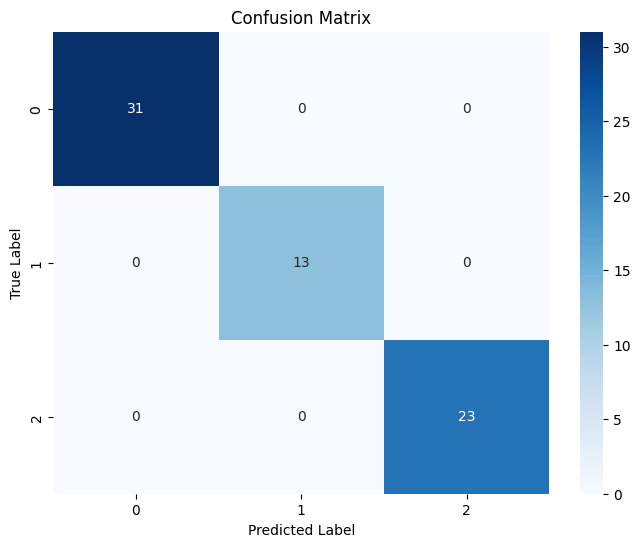

In [ ]:
# heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nb_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#cm: Data yang akan dipetakan.
#annot=True: Menampilkan nilai di dalam sel heatmap.
#fmt='d': Mengatur format tampilan angka menjadi desimal (bilangan bulat).
#cmap='Blues': Mengatur palet warna heatmap menjadi variasi biru.

In [ ]:
#using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Mempersiapkan data untuk regresi linier
# Menggunakan culmen_length_mm sebagai fitur (variabel independen)
# Menggunakan body_mass_g sebagai target (variabel dependen)
X = dataset[['culmen_length_mm']]  # Fitur (variabel independen)
y = dataset['body_mass_g']  # Target (variabel dependen)

In [ ]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penjelasan pembagian data:
# X: Data fitur (input) yang digunakan untuk membangun model.
# y: Target (output) yang akan diprediksi oleh model.
# test_size=0.2: 20% dari dataset digunakan untuk pengujian, sementara 80% untuk pelatihan.
# random_state=42: Membuat pembagian data konsisten setiap kali kode dijalankan (agar hasil bisa direproduksi).


In [ ]:
# Membuat model Linear Regression model
model = LinearRegression()

In [ ]:
# Melatih model dengan data
model.fit(X_train, y_train)

# Menggunakan model untuk prediksi nilai baru
y_pred = model.predict(X_test)

In [ ]:
# Menampilkan koefisien (kemiringan) dan intersep
coefficients = model.coef_
# Koefisien regresi (slope)
intercept = model.intercept_
# Intersep (nilai prediksi ketika fitur bernilai 0)

coefficients, intercept

(array([90.56941831]), 223.62200165002514)

In [ ]:
from sklearn.metrics import mean_squared_error
# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menampilkan nilai MSE
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 443075.91


### 1. **Decision Tree dengan Entropy:**
   - **Akurasi**: 97%
   - **Precision, Recall, dan F1-score**: Semua kelas (0, 1, 2) memiliki skor yang tinggi, dengan rata-rata **0.96** pada precision, recall, dan F1-score.
   - **Confusion Matrix**: Hanya ada beberapa kesalahan kecil, terutama pada kelas 0 dan 1, di mana satu instance salah diklasifikasikan.

### 2. **Decision Tree dengan Gini Index:**
   - **Akurasi**: 99%
   - **Precision, Recall, dan F1-score**: Skor lebih tinggi dibandingkan metode Entropy, dengan rata-rata **0.99**.
   - **Confusion Matrix**: Hampir sempurna, dengan hanya satu instance salah di kelas 1. Tidak ada kesalahan untuk kelas lainnya.

### 3. **Naive Bayes (GaussianNB):**
   - **Akurasi**: 100%
   - **Precision, Recall, dan F1-score**: Semua kelas mendapatkan skor sempurna **1.00** pada precision, recall, dan F1-score.
   - **Confusion Matrix**: Tidak ada kesalahan sama sekali dalam klasifikasi, yang berarti model ini mengklasifikasikan seluruh data dengan benar.

### 4. **Linear Regression:**
   - **Mean Squared Error (MSE)**: **443075.91** menunjukkan bahwa ada jarak yang cukup besar antara prediksi dan nilai sebenarnya pada data regresi. Ini menunjukkan bahwa Linear Regression kurang cocok untuk kasus ini.

### **Kesimpulan:**
- **Naive Bayes (GaussianNB)** adalah model yang paling baik dengan akurasi sempurna (100%), precision, recall, dan F1-score yang semuanya 1.0. Model ini berhasil mengklasifikasikan seluruh data dengan benar tanpa ada kesalahan.
- **Decision Tree dengan Gini Index** juga memberikan hasil yang sangat baik dengan akurasi 99%, sedikit lebih baik dibandingkan dengan **Decision Tree dengan Entropy** yang akurasinya 97%.
- **Linear Regression** tidak memberikan hasil yang optimal untuk kasus ini, terbukti dari nilai **Mean Squared Error** yang tinggi, menunjukkan prediksi yang tidak akurat.

**Kesimpulan utama**: **Naive Bayes** adalah model terbaik untuk dataset ini berdasarkan performa akurasi dan metrik lainnya.

Good Luck :)